<a href="https://colab.research.google.com/github/eric1645/CSE--/blob/main/cse_HW02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. h = 0.2로 동일하게 간격이 나누어진 uniform nodes를 사용하여, 본 함수의 Lagrange interpolating polynoimal P(x)를 찾고 그리시오

P(x): -139.041402142761*x**10 + 1.27897692436818e-13*x**9 + 314.581172347997*x**8 - 1.70530256582424e-13*x**7 - 247.244290299021*x**6 - 4.9737991503207e-14*x**5 + 83.4829453840991*x**4 + 3.5527136788005e-14*x**3 - 12.7196017609019*x**2 - 6.66133814775094e-16*x + 1.0


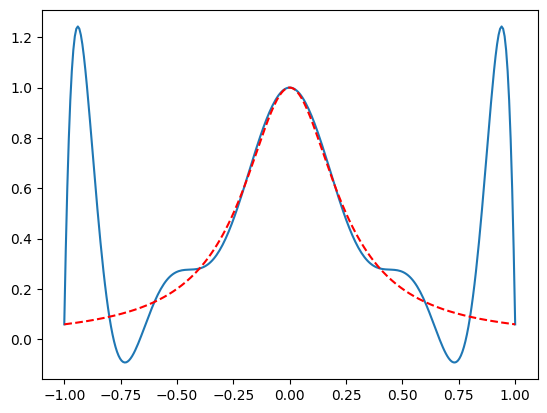

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, lambdify

x = symbols('x')

#주어진 함수
def f(x):

  return 1/(1+16*x**2)

#lagrange 함수 정의
def lagrange(x_points,y_points):
  P = 0
  n = len(x_points)
  for i in range(n):
    L = 1
    for j in range(n):
      if j!= i:
        L *= (x - x_points[j])/(x_points[i] - x_points[j])
    P += y_points[i]*L

  return simplify(P)

#uniform nodes
x_points = np.linspace(-1,1,11)
y_points = [f(x_points[i]) for i in range(11)]

#lagrange polynomial 생성 및 출력
P = lagrange(x_points,y_points)
print("P(x):",P)
P_func = lambdify(x, P, modules = ['numpy'])

#시각화
x_vals = np.linspace(min(x_points),max(x_points), 300)
y_vals = P_func(x_vals)
y_true = f(x_vals)

plt.plot(x_vals,y_vals)
plt.plot(x_vals,y_true,'r--')


### 2. 동일한 과정을 Chebyshev nodes를 사용하여 진행하시오

P(x): -33.8021340382322*x**10 - 2.66453525910038e-15*x**9 + 95.0685019825281*x**8 + 3.01980662698043e-13*x**7 - 98.8976499790463*x**6 + 4.12114786740858e-13*x**5 + 46.8492956384383*x**4 + 9.2370555648813e-14*x**3 - 10.1902582121789*x**2 + 1.77635683940025e-15*x + 1.0


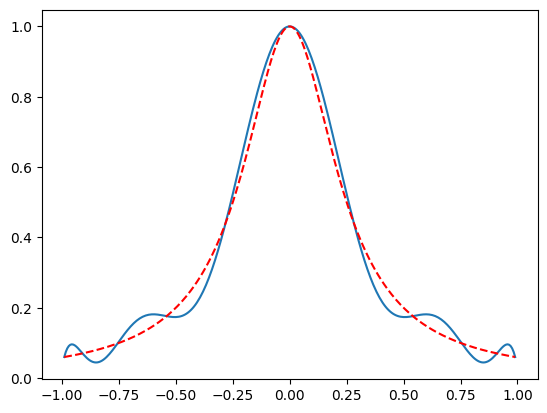

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, simplify, lambdify

x = symbols('x')

#주어진 함수
def f(x):

  return 1/(1+16*x**2)

#lagrange 함수 정의
def lagrange(x_points,y_points):
  P = 0
  n = len(x_points)
  for i in range(n):
    L = 1
    for j in range(n):
      if j!= i:
        L *= (x - x_points[j])/(x_points[i] - x_points[j])
    P += y_points[i]*L

  return simplify(P)

#chebyshev nodes
x_points = [math.cos(math.pi*(2*i + 1)/(2*10+2)) for i in range(11)]
y_points = [f(x_points[i]) for i in range(11)]

#lagrange polynomial 생성 및 출력
P = lagrange(x_points,y_points)
print("P(x):",P)
P_func = lambdify(x, P, modules = ['numpy'])

#시각화
x_vals = np.linspace(min(x_points),max(x_points), 300)
y_vals = P_func(x_vals)
y_true = f(x_vals)

plt.plot(x_vals,y_vals)
plt.plot(x_vals,y_true,'r--')

### 3. Chebyshev nodes를 사용하였을 때가, 동일한 간격으로 나누어진 격자 점을 사용한 경우보다 좋은 결과를 보이는지 서술하시오.

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.9898214418809327, 0.9096319953545184, 0.7557495743542583, 0.5406408174555977, 0.2817325568414298, 2.83276944882399e-16, -0.28173255684142967, -0.5406408174555972, -0.7557495743542582, -0.9096319953545182, -0.9898214418809327]


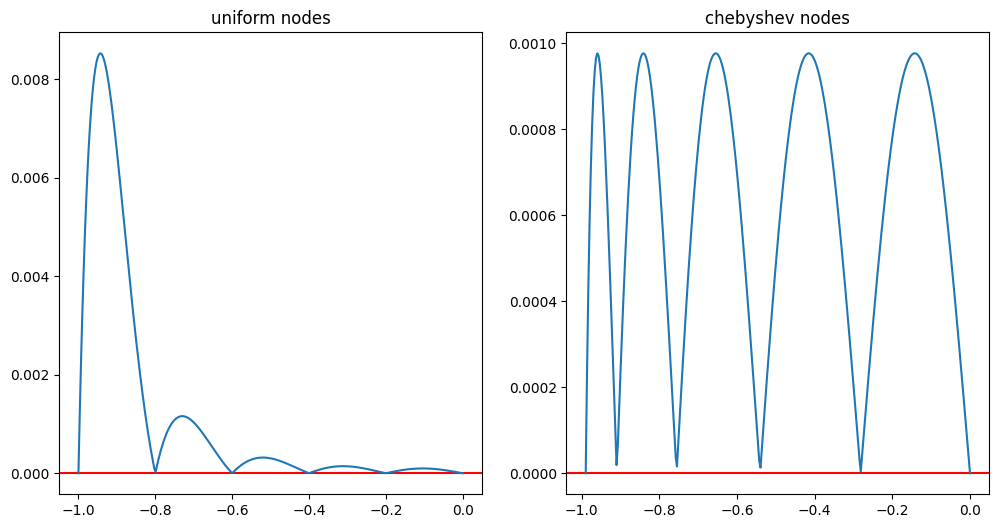

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, lambdify

x = symbols('x')

#uniform and Chebyshev nodes 생성
x_uniform = np.linspace(-1, 1, 11)
x_chebyshev = [math.cos(math.pi*(2*i + 1)/(2*10+2)) for i in range(11)]

#함수 생성
def g(nodes):
  func = 1
  n = len(nodes)

  for i in range(n):
    func *= abs(x-nodes[i])

  result = lambdify(x, func, modules = ['numpy'])

  return result

#uniform node와 chebyshev node로 함수 생성
uniform_func = g(x_uniform)
chebyshev_func = g(x_chebyshev)

#그래프 시각화
x_vals1 = np.linspace(min(x_uniform),0, 300)
y_vals1 = uniform_func(x_vals1)

x_vals2 = np.linspace(min(x_chebyshev),0, 300)
y_vals2 = chebyshev_func(x_vals2)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.axhline(y=0, color='r')
plt.plot(x_vals1,y_vals1)
plt.title('uniform nodes')

plt.subplot(1, 2, 2)
plt.axhline(y=0, color='r')
plt.plot(x_vals2,y_vals2)
plt.title('chebyshev nodes')

print(x_uniform)
print(x_chebyshev)

uniform nodes를 사용하여 lagrange interpolating을 하면 주어진 구간의 양 끝에서 진동하는 runge 현상이 발생한다. 반면 Chebyshev nodes를 사용하여 lagrange interpolating을 진행하면 구간의 양 끝에서 진동하는 현상이 작게 발생하는 것을 확인할 수 있다. 이는 위의 그래프를 통해 설명할 수 있다. uniform nodes와 달리 chebyshev nodes는 구간의 양 끝에 nodes가 몰려있다. 이는 interpolating을 할 때 양 끝에서의 결과를 보정해준다. 따라서 Chebyshev nodes를 사용할 때 구간의 양 끝에서 진동이 줄고 더 좋은 결과를 보여준다.


### 4. Cubic spline interpolation을 사용하여 1,2에 대해 진행하시오.

Text(0.5, 1.0, 'chebyshev nodes')

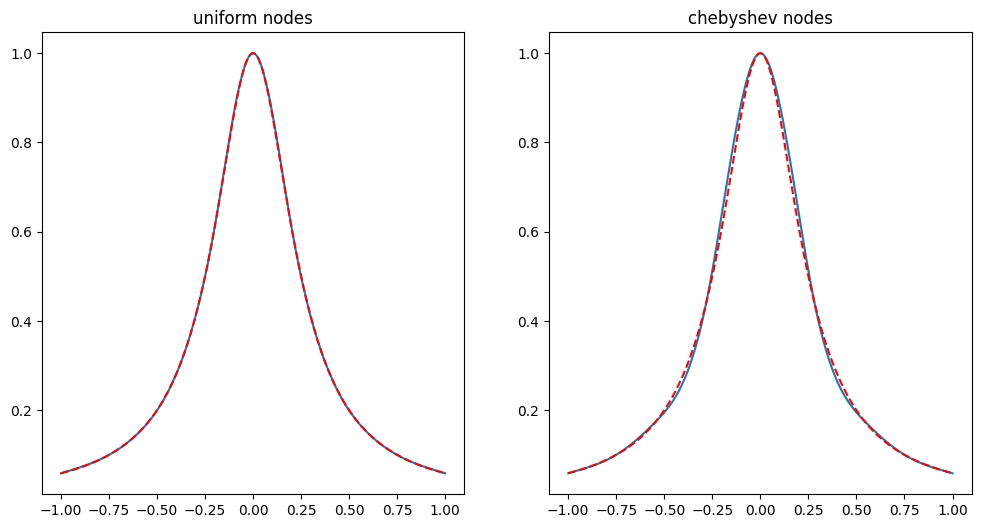

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline

#주어진 함수
def f(x):

  return 1/(1+16*x**2)

#uniform and chebyshev node 생성
x_uniform = np.linspace(-1, 1, 11)
y_uniform = [f(x_uniform[i]) for i in range(11)]

x_chebyshev = sorted([math.cos(math.pi*(2*i + 1)/(2*10+2)) for i in range(11)])
y_chebyshev = [f(x_chebyshev[i]) for i in range(11)]

#Cubic spline interpolation
cs_uniform = CubicSpline(x_uniform, y_uniform, bc_type = 'natural')
cs_chebyshev = CubicSpline(x_chebyshev, y_chebyshev, bc_type = 'natural')

#interpolation 결과 시각화
x=np.linspace(-1,1,300)
y_cs_uniform = cs_uniform(x)
y_cs_chebyshev = cs_chebyshev(x)
y_true = f(x)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(x,y_cs_uniform)
plt.plot(x, y_true,'r--')
plt.title('uniform nodes')

plt.subplot(1, 2, 2)
plt.plot(x,y_cs_chebyshev)
plt.plot(x, y_true,'r--')
plt.title('chebyshev nodes')

### 5. Chebyshev node를 사용하여 Lagrangian interpolation과 Cubic spline method를 적용한 결과와 Exact solution 과의 비교를 통한 Error 분석을 하고, 이에 대한 본인의 의견을 서술하시오.

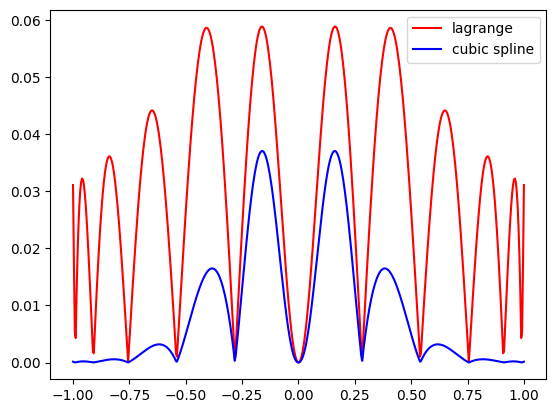

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, simplify, lambdify
from scipy.interpolate import CubicSpline

x = symbols('x')

#주어진 함수
def f(x):

  return 1/(1+16*x**2)

#lagrange 함수 생성
def lagrange(x_points,y_points):
  P = 0
  for i in range(len(x_points)):
    L = 1
    for j in range(len(x_points)):
      if j!= i:
        L *= (x - x_points[j])/(x_points[i] - x_points[j])
    P += y_points[i]*L

  return P

#chebyshev node 생성
x_chebyshev = sorted([math.cos(math.pi*(2*i + 1)/(2*10+2)) for i in range(11)])
y_chebyshev = [f(x_chebyshev[i]) for i in range(11)]

#lagrange interpolation and cubic spline interpolation 적용
lagrange_interpolate = lambdify(x, lagrange(x_chebyshev, y_chebyshev), 'numpy')
cs_interpolate = CubicSpline(x_chebyshev, y_chebyshev)

#interpolation의 error
n = np.linspace(-1,1,500)
y_true = f(n)
e_lag = np.abs(y_true-lagrange_interpolate(n))
e_cub = np.abs(y_true-cs_interpolate(n))

#결과 시각화
plt.plot(n, e_lag,'r',label = 'lagrange')
plt.plot(n, e_cub,'b',label = 'cubic spline')
plt.legend()

위 그래프를 통해 Cubic spline method를 적용한 결과가 Lagrangian interpolation을 적용한 결과보다 Exact solution과의 Error가 더 작다는 것을 확인할 수 있다. 이는 Lagrangian method가 구간을 나누지 않고 모든 nodes를 지나는 높은 차수의 다항식을 사용해 interpolating을 진행하기 때문에 오차가 발생한다고 생각할 수 있다. 반면 Cubic spline method는 n개의 node에 대해 n-1개의 구간을 나눠 3차 다항식으로 보간을 진행하기 때문에 Lagrangian method보다 정확하다고 볼 수 있다.